## Introduction

This activity is one path into the fractal geometry of the Serpienski triangle. It makes use of a random 
process... and because it is best seen repeated many times we use a computer program to do the repetition.

Other approaches?  There are many! The even/odd pattern of the Meru Prastarah, recusion, cellular
automata, decision trees. In my experience to date the most interesting idea follows from Egon with
his die and his paint pots: The idea of inward-falling projections described at the botton of this notebook.

## Egon in the Monte Carlo piazza

This math problem is stated as a procedure that is repeated over and over again. Since it involves an algorithm we place it on the East side of the map. And after you learn the algorithm there are a number of questions that follow.


* Does the procedure or algorithm produce a result that is obvious? or surprising? (guess!)
* Does the result resemble anything else we see in our landscape? 
* Are there alternative versions of the procedure that produce interesting patterns?
* Is there a good way of understanding the patterns we find here without simply using the computer?

The answers, in case you are wondering, are: Surprising, yes, yes, and yes. So let's begin!

Egon is a painter and a poet. He lives in the beautiful town of Monte Carlo by the sea. He one day finds a die in his beard. A die is the little cube with the pips on each face you use in games like Yatzee and Monopoly.  Egon starts rolling numbers from one to six, noticing that each number comes up with equal probability. Egon thinks about this for a while. He scratches his chin and it dawns on him that while the die is producing a number from one to 6... it is 
also producing a number from one to three (if he counts 'one or two' as 'one' and so on) and the die is also behaving like a coin (if 1 or 2 or 3 is 'heads'). 

Egon next falls asleep and dreams of painting the town square (or 'piazza') using three colors of paint. 
When he wakes up he decides to implement a random procedure in the manner of his dream. He will use the die 
to determine how he will paint the town square. Here is his procedure...

In the piazza he places three cans of paint A, B and C on the ground as markers -- very far apart from one another -- to define the corners of a triangle ABC. He walks to a fourth location somewhere near triangle ABC. There he begins his procedure: 


Procedure:


  Roll the die
  
    on a 1 or 2: Move halfway to A
    
    on a 3 or 4: Move halfway to B
    
    on a 5 or 6: Move halfway to C 
    
  Paint a little dot on the ground (red if A, green if B, blue if C)
  
  Repeat
  
  
Using this method Egon rolls, moves, and paints repeatedly. He figures that after some time he will completely finish painting in triangle ABC with red, green and blue dots. Is he correct? Or might something unexpected result? You can 
try this yourself on a piece of paper: You do not need a die (you can just pick some random numbers) and you don't 
need paint; you can just write little letters. You also do not need a ruler; just be approximate.

The Python program below simulates Egon's painting process using a random number generator. It shows what the piazza looks like after Egon has painted some number of dots. It will take a moment for the computer to produce this picture.
<br>
<br>
<Big>**Change the value of 'nRolls' to make more or fewer dots.**</Big>

In [3]:
########################
########################
##
## Other Math Club people:
## Adjust nRolls!!!!! 4, 40, 400, 4000, 40000, 400000 etcetera

nRolls = 500000

##
##
########################
########################

# import the numerical Python library
import numpy as np
from random import random as can_coord
from random import randint as die

# put the resulting figure below this cell in the browser
%pylab inline

# To see random cans set this value to True
random_cans = False

# The three paint cans are placed carefully... but we could choose to place them randomly also.
# Three (geometrical) vertices of an equilateral triangle of side = 1, one vertex at the origin
if random_cans:
    can1 = np.array([can_coord(), can_coord()])
    can2 = np.array([can_coord(), can_coord()])
    can3 = np.array([can_coord(), can_coord()])
else:
    can1 = np.array([0.0, 0.0])
    can2 = np.array([1.0, 0.0])
    can3 = np.array([0.5, np.sqrt(3.0)/2.0])

# Two Lists: A list of numpy 2-element arrays (x and y locations) and a list of color strings
x = [np.array([0.1, 0.7])]
c = ['k'] 

# From point 'a' jump half way to point 'b' and return that new location
def MoveHalfway(a, b):
    return a + 0.5*(b-a)

# From location a generate three new points c, d, e and call myself recursively
#   Unless I have reached a particular end level based on the level counter
def Paint_a_dot(my_location):   
    die_roll = die(1,6)
    if die_roll < 3:   next_can, this_dot_color = can1, 'r'
    elif die_roll < 5: next_can, this_dot_color = can2, 'g'
    else:              next_can, this_dot_color = can3, 'b'
    new_location = MoveHalfway(my_location, next_can)    
    x.append(new_location)
    c.append(this_dot_color)
    return

for i in range(nRolls): Paint_a_dot(x[i])

xc=[q[0] for q in x]
yc=[q[1] for q in x]   

# Let's make this a big figure
figdim = 30
plt.figure(figsize=(figdim,figdim))

if nRolls < 10: dotsize = 4000
elif nRolls < 100: dotsize = 1000
elif nRolls < 1000: dotsize = 200
elif nRolls < 10000: dotsize = 100
else: dotsize = 1

# The ',' comma marker is a small dot, as is the period '.' marker:
plt.scatter(xc, yc, s=dotsize, marker='.', color=c)
plt.xlim([0., 1.])
plt.ylim([0., 1.])

Populating the interactive namespace from numpy and matplotlib


(0.0, 1.0)

#### Variation of the above

The next code block below might be of more interest to you if you are learning programming. It goes through a 
similar process to paint the town square as above. However instead of rolling dice to choose one direction it 
goes in all three directions in order. It uses a technique called recursion where a function calls itself. This 
is a bit like looking into a mirror with another mirror behind you: It looks like you can fall into an infinite number of smaller reflections of yourself. Here we limit the falling to 11 levels deep.


In [ ]:
###################
##
## Change this value to control the depth of the recursion
##
recursion_depth = 4
##
###################

# import the numerical Python library
import numpy as np

# put the resulting figure below this cell in the browser
%pylab inline

# The three paint cans are placed carefully... but we could choose to place them randomly also.
# Three (geometrical) vertices of an equilateral triangle of side = 1, one vertex at the origin
v1 = np.array([0.0, 0.0])
v2 = np.array([1.0, 0.0])
v3 = np.array([0.5, np.sqrt(3.0)/2.0])

# Two Lists: Will hold pairs of (x, y) coordinates
x = []
y = []

# We add a first (seed) point to our list of points, outside the triangle
# x.append(0.924)
# y.append(0.873)

# To make the results look cleaner start with these values:
x.append(0.0)
y.append(0.0)

# We indicate that we have one point so far by pointing to its index, 0
currentIndex = len(x)-1

# Euclidean distance returned as a float (not used)
def distance(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

# From point a jump half way to point b and return that new location
def MoveHalfway(a, b):
    return a + 0.5*(b-a)

# From location a generate three new points c, d, e and call myself recursively
#   Unless I have reached a particular end level based on the level counter
def Trifurcate(a, level, endLevel):

    # currentIndex is easy to work with as a global variable
    global currentIndex
    
    # if we are deep enough in the recursion: Just quit
    if level == endLevel: return
    
    # The first of three new locations is q
    q = MoveHalfway(a, v1)
    
    # Now append q onto the x/y Lists
    x.append(q[0])
    y.append(q[1])
    currentIndex += 1
    
    # Recurse to myself using q as the new seed
    Trifurcate(q, level + 1, endLevel)
    
    # And repeat this two more times with respect to v2 and v3
    q = MoveHalfway(a, v2)
    x.append(q[0])
    y.append(q[1])
    currentIndex += 1
    Trifurcate(q, level + 1, endLevel)
    
    q = MoveHalfway(a, v3)
    x.append(q[0])
    y.append(q[1])
    currentIndex += 1
    Trifurcate(q, level + 1, endLevel)
    
    # And now we're all done
    return


# This is the 'program' that runs from the seed point
Trifurcate((x[currentIndex],y[currentIndex]), 0, recursion_depth)

# Draw the scatter plot of (x, y) pairs
figdim = 30
plt.figure(figsize=(figdim,figdim))

if recursion_depth <= 5: dotsize = 1000
elif recursion_depth == 6: dotsize = 300
elif recursion_depth == 7: dotsize = 49
else: dotsize = 1
    
# The ',' comma marker is a small dot, as is the period '.' marker:
plt.scatter(x, y, s=dotsize, marker='.', color='r')
plt.xlim([0., 1.])
plt.ylim([0., 1.])

# Mention how many points we ended up with
print len(x)
# print dir(x)


#### Continuing the thought

Hopefully you find the result of the painting algorithm a little bit surprising. We now remind you
of the three remaining questions for our original set of four: 

* Does the result resemble anything else we see in our landscape? 
* Are there alternative versions of the procedure that produce interesting patterns?
* Is there a good way of understanding the patterns we find here without simply using the computer?

To answer the second question, if you have not already, you might try coloring in the even and odd cells 
of the Pascale triangle with two colors. To save time you can also just color the odd cells and leave 
the even ones blank. 

To answer the third question we have the Python cell below. It is a bit more complicated so it might 
work well to check in with another one of your colleagues or the club advisors. 

To remind you there are essentially about three or four key ideas built into Egon's algorithm:

* There are three cans of paint (so you might ask 'what if we use only two? or four? or more?')
* The next can of paint is chosen with equal likelihood (so 'what if we made some cans more likely than others?')
* The cans of paint are laid out in an equilateral triangle (so 'what if they were placed at random?')
* Every move is from where Egon stands halfway to the next paint can (so 'what if he moves 1/3 of the way? or .617 of the way?)

# Experiment!

In the cell below we have computer code that draws figures. As always you select the cell, hold down Shift and press Enter.

There are 4 values or parameters at the top under "CONTROLS". You change the values on the right (not the 
names on the left). For example try changing nVertices from 3 to 5.

Before

```
nVertices = 3
```

After you change it:

```
nVertices = 5
```

### Have fun with the *howfar* parameter

Remember that like Ms. Halfway: Egon always goes halfway to the next vertex every time he rolls his die. You can
choose to go halfway by setting 

```
howfar = 0.5
```

You can go more than halfway or less than halfway by changing **howfar** as you like, for example

```
howfar = 0.42
```

You could even try to "overshoot" or "run the other way" using **howfar**. 


### Caution on the *nDepth* parameter

Use care in changing 'nDepth': If you make it too large the program will never finish your figure. Only add or 
subtract one from nDepth each time you run the program. Also if you decide to make nVertices large, like 11: 
You should set nDepth back to be very small (like 4). Make sure that works before you increase nDepth to fill
in the diagram more. 

### What about *randomVertices* ?

Make this parameter True in order to place the vertices in random locations. We suggest you do this 
only after you have experimented with the other parameters and have a sense of what they do. We also suggest
beginning with three vertices. Egon will follow the same rules as before. 
You might try and predict what the result will look like before running the cell.

Populating the interactive namespace from numpy and matplotlib
0 1.0 0.5
1 0.654508497187 0.975528258148
2 0.0954915028125 0.793892626146
3 0.0954915028125 0.206107373854
4 0.654508497187 0.0244717418524
488281


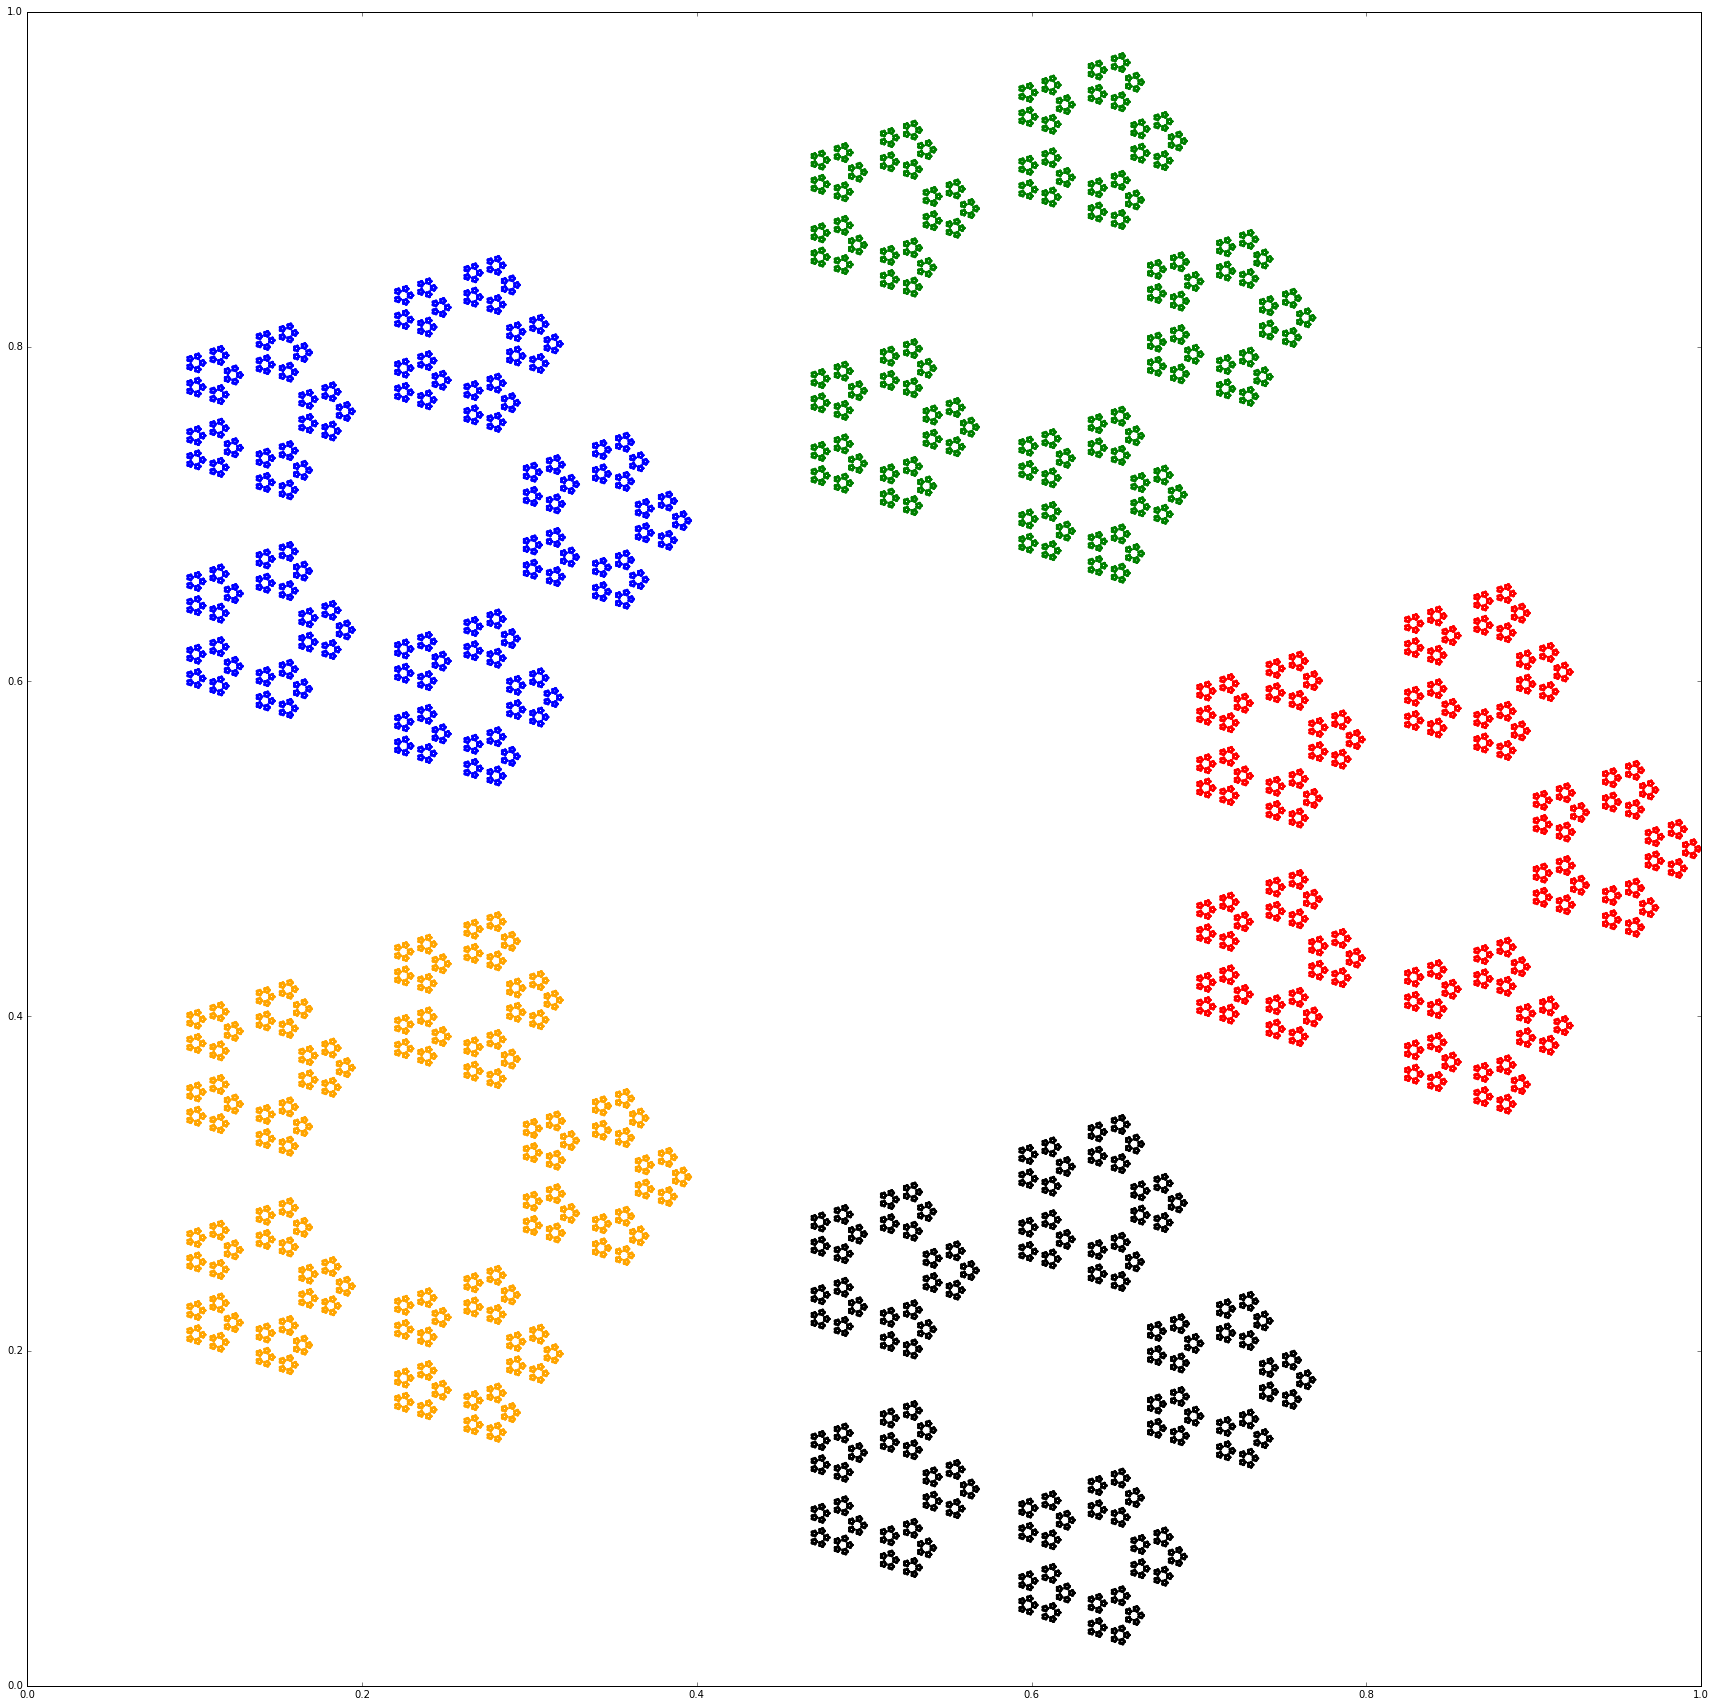

In [10]:
##########################
##
## CONTROLS
##
## This is what you adjust... change these four values to experiment
##     - make 'nDepth' small to begin with, especially if you make nVertices large
##     - make nVertices any integer you like greater than 0
##     - make 'howfar' any decimal number you like: 0.4, 0.6, -.1, 1.2, ...
##     - make 'randomVertices' either True or False (make sure you capitalize True or False)
##
nDepth = 8
nVertices = 5
howfar = 0.667
randomVertices = False
##
##########################
# import the numerical Python library
import numpy as np
import random as r

# put the resulting figure below this cell in the browser
%pylab inline

####################
###
###  Controls Section
###
####################
# The three paint cans are placed carefully... but we could choose to place them randomly also.
# Three (geometrical) vertices of an equilateral triangle of side = 1, one vertex at the origin
#
# Rule of thumb on how many vertices... More makes the program slower.
# 3 vertices: Depth can be 10 or maybe even 11
# 7 vertices: Make depth no bigger than 7 

# This is our starting point, the triangular one
# nDepth = 11
# nVertices = 3
# howfar = 0.5

# Here is a pretty one
# nDepth = 5
# nVertices = 15
# howfar = 0.6

# Here is a pretty one
# nDepth = 5
# nVertices = 15
# howfar = 0.6

# Another with many vertices
# nDepth = 4
# nVertices = 23
# howfar = 0.72

# Simpler: Only five vertices
# nDepth = 9
# nVertices = 5
# howfar = 0.55

# Izzie likes these numbers!
# nDepth = 8
# nVertices = 5
# howfar = 0.54

# nDepth = 9
# nVertices = 3
# howfar = 0.5

# nDepth = 7
# nVertices = 6
# howfar = 0.5*(0.5+0.66666666666666)

centerx = 0.5
centery = 0.5
radius = 0.5
twopi = np.pi * 2.0
delta_angle = twopi / float(nVertices)

colorList = ['r', 'g', 'b', 'orange', 'k', 'cyan', 'magenta', 'yellow', 'grey']
color_modulo = len(colorList)

# Now v is a list of np.arrays
v = []

if randomVertices:
    for i in range(nVertices):
        thisx = r.random()
        thisy = r.random()
        v.append(np.array([thisx, thisy]))
        print i, thisx, thisy
else:
    this_angle = 0.0
    for i in range(nVertices):
        thisx = radius * np.cos(this_angle) + centerx
        thisy = radius * np.sin(this_angle) + centery
        v.append(np.array([thisx, thisy]))
        this_angle += delta_angle
        print i, thisx, thisy
    
# Two Lists: Will hold pairs of (x, y) coordinates
x = []
y = []
mycolors = []

# To make the results look cleaner start with these values:
x.append(1.0)
y.append(0.5)
mycolors.append('k')

# We indicate that we have one point so far by pointing to its index, 0
currentIndex = len(x)-1

# From point a jump half way to point b and return that new location
def MovePartway(a, b):
    global howfar
    return a + howfar*(b-a)

# From location a generate nVertices new points c, d, e, ... and call myself recursively
#   Unless I have reached a particular end level based on the level counter
def FollowManyPaths(a, level, endLevel): 

    # currentIndex is easy to work with as a global variable
    global currentIndex
    
    # if we are deep enough in the recursion: Just quit
    if level == endLevel: return
    
    for i in range(nVertices):
        q = MovePartway(a, v[i])
        x.append(q[0])
        y.append(q[1])
        mycolors.append(colorList[i%color_modulo])
        currentIndex += 1
        FollowManyPaths(q, level + 1, endLevel)
    
    # And now we're all done
    return


# This is the 'program' that runs from the seed point
FollowManyPaths((x[currentIndex],y[currentIndex]), 0, nDepth)

# Draw the scatter plot of (x, y) pairs
figdim = 30
plt.figure(figsize=(figdim,figdim))

# The ',' comma marker is a small dot, as is the period '.' marker
plt.scatter(x, y, s=1, marker='.', color=mycolors)
plt.xlim([0., 1.])
plt.ylim([0., 1.])

# Mention how many points we ended up with
print len(x)
# print dir(x)


## Inward-falling projections

As noted up above there are four starting questions, and we have answered three of them. There is just enough
time to make a comment about the last question, which we repeat...

* Is there a good way of understanding the patterns we find here without simply using the computer?

The answer -- as noted -- is 'yes!' and the next two sections give hints and one piece of the answer. Before reading
further you may wish to try and come up with the solution on your own. It might be easier to do this if you have
thoroughly explored the Python cell just up above, particularly the four main parameters.

The question we have for you is this: Can you invent more questions beyond the four we have posed?

#### Hint

To understand why the triangles have ever-smaller triangular holes in them: Try drawing out the town square 
in pencil on a piece of paper. As mentioned above: You need not have a ruler or a die or colored pencils. 
You can learn a lot about the process by simply repeating it (approximately) yourself a few times. 

Since it seems to be very difficult to make dots in the central large triangular hole: Begin by asking 
'suppose Egon started right in the middle of that hole... where would he end up as he hopped about?'

Finally consider the idea of reversibility. Given that we are taking a strange sort of random walk:
Is there ever a way of going to where we were a moment before? It is this idea that leads to the
strange conclusion that generating the pattern depends on time moving in only one direction. 


#### Partial Solution

Let's call the big triangle $T$ and the upside-down central empty triangle $v$ ('v' for 'void'). We'll 
consider this to be the top level and in what follows we will need labels for the triangles and voids 
down at the next level and the level below that. 

The void $v$ is 
surrounded by three other triangles of the same size, and these are filled in with dots and triangular voids 
just like $T$. Let's call those partially-painted-in triangles $t_{1}$, $t_{2}$ and $t_{3}$.

Each of the $f$ triangles is a miniature version of $T$. Each has a central void and since we are now one
level down let's give those smaller voids indices matching their $t$ parent triangles: $v_1$, $v_2$ and $v_3$. 
This is the second level down; and for purposes of comparison we need just one more level to make progress.

The three partially-painted-in triangles filling in the corners of $t_1$, $t_2$ and $t_3$ can be given two
indices, for example (for $t_1$) we have $t11$, $t12$, $t13$. These triangles in turn each have central voids
$v11$, $v12$, and $v13$. In this case there are 6 additional triangles and 6 additional voids. 
Counting as we go the top-level triangle $T$ has 1 void, then the next level down has 3 smaller voids, 
then 9 smaller voids after that and so on: Always a power of $3$.

Suppose we have Egon begin inside $v$. No matter where he is inside that void and no matter what number he 
rolls on his die he will be obliged to leave $v$ and will end up inside one of the three next-smaller voids 
$v_1$, $v_2$, or $v_3$. From inside these three voids there is no way to return to $v$. You might be obliged
to convince yourself that this is true. One way to do that is to ask the question 'Where would I have to be 
to land inside $v$ supposing I roll a $1$?' Ask the same question for $2$ and $3$ and you will see that 
you can't get to $v$ from your current location inside either $v_1$ or $v_2$ or $v_3$. 

Therefore Egon can visit $v$ but once, and from then on he is forever fated never to return to $v$.

The three smaller triangles $v_1$, $v_2$ and $v_3$ are in a sense smaller projections of $v$ towards
the three respective corners. Once you visit one of them: On your next roll you will find yourself
in a triangle at the next level down: One of the $v_{ij}$ triangles. And so on: Each time you jump
you jump into the set of triangular voids one level down. Hence one of the mysteries of the big
triangle is solved: There are empty triangles because you can only land in them (at most) once on your way 
down the levels. Each time you roll the die you go down a level: to the 3rd, 4th, ... down to the 10th 
to the hundredth and the thousandth level down, where the void triangles are simply
microscopically small: And *importantly* those tiny void triangles are **outside** all of 
the triangular voids of all the higher levels that came before. 

The second mystery follows a bit more mysteriously: If we are not drawing dots inside the void triangles...
where *are* we placing the dots? After all the voids seem to sort of take over the whole triangle the 
more we think about them. The best answer I can come up with is to repeat the answer above in a slightly
different way: The dots are painted either inside very small voids or on the edges of very small voids. 
In either case they can be very very close to but not *in* the larger voids. Since our eyes can ony 
make out the larger voids, down to say level 7 or 8, what we see with the many dots are (after the 
first 7 or 8 dots are placed) locations down amongst the level 9 or 10 or 11 or ... (and so on) voids.

To cut away to a completely different example: Suppose that we were to start over with a clean town 
square and this time generate completely random locations. Only each time we were only allowed to paint a 
dot if it was further than 50 meters from the center of the square. Each dot we place will contribute to
a very speckled pattern and some of those speckles will be very close to (but slightly further than) 
$50$ meters from the center of the piazza. Sure enough all of those speckles are eventually going to
create a very clear outline of a circle with a radius of $50$ meters. Something similar is happening 
with the triangle, only rather than avoiding a *circle* our algorithm for Egon avoids the triangular
voids. Now it will continue to avoid all of these voids but the noticeable ones are the ones we can
see (the ones we can notice).

One more detail about visual perception: Mathematically Egon's paint dots are infinitely small... but in
order to see them we need to give them a little bit of size or area. If you place such a dot of color
next to a very very small void triangle, one that is much smaller than the size of the dot, you will 
end up with paint inside that void triangle. I'm afraid it is unavoidable.

#### One more question

This one is a calculation. Can you calculate the amount of area occupied by all of the voids in the triangle 
when they are summed together? This is one of the other math club challenge puzzles. You can for the sake of argument assume that the triangle $T$ has area $1$. And then: What is the perimeter of a figure produced by drawing the edges of the triangular voids.